**# PROJECT OBJECTIV**

*# Develop a quantitative model that:*

Design and evaluate a data-driven investment strategy that minimizes portfolio risk while providing clients with clear, evidence-based allocation recommendations.

- Analyzes the historical returns of a selected NEV brand group of assets (e.g., Tesla, NIO, BYD, XPeng).

- Estimates the optimal portfolio weights that minimize risk (variance).

- Applies bootstrapping to assess the robustness and uncertainty of the allocation strategy.

- Presents results in a clear, business-friendly format for use by financial advisors or investment teams.



### Methods to be Used

- Mean-Variance Portfolio Optimization

- Bootstrapping (500 resamples) to assess stability

- Covariance Matrix Estimation

- Optional extension: Historical simulation of returns


### Business Impact

- This analysis allows the firm to:

- Provide risk-adjusted portfolio recommendations

- Show clients confidence intervals for asset weights

- Support compliance and transparency with data-backed strategies

- Increase trust through quantitative insights in volatile sectors like EV stocks


**# Our Goal:**

**# Create a bootstrapping strategy in portfolio project (to find optimal stock weighting minimizing variance).**

- Predict the trend of each stock for the next 3 months.

- Give Python code to achieve all this.

Plan of Action: We’ll do two things:


**# Part 1: Portfolio Optimization Using Bootstrapping** Use daily "Price" from all 4 stocks**

- Calculate daily returns

- Estimate the optimal allocation across 4 stocks to minimize portfolio variance

- Bootstrap to get standard error of allocation weights


In [ ]:
# Step 0: Import Libraries and Define File Paths

In [ ]:
# Step 1: Load and Preprocess the Data

In [14]:
import pandas as pd
import numpy as np

# Define local file paths
file_paths = {
    "Tesla": r"C:\Users\Mandy_2024007\Desktop\Finacial Dataset\Tesla Stock Price History.csv",
    "NIO": r"C:\Users\Mandy_2024007\Desktop\Finacial Dataset\Nio A ADR Stock Price History.csv",
    "BYD": r"C:\Users\Mandy_2024007\Desktop\Finacial Dataset\BYD ADR Stock Price History.csv",
    "XPeng": r"C:\Users\Mandy_2024007\Desktop\Finacial Dataset\Xpeng Stock Price History.csv"
}

# Define preprocessing function
def preprocess_data(path):
    df = pd.read_csv(path)
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values('Date')
    df['Price'] = pd.to_numeric(df['Price'].astype(str).str.replace(',', ''), errors='coerce')
    df['Return'] = df['Price'].pct_change()
    return df.dropna()

# Apply preprocessing to each dataset
dataframes = {name: preprocess_data(path) for name, path in file_paths.items()}


In [16]:
# Check if Tesla data loaded correctly
print("Tesla sample:")
print(dataframes["Tesla"].head(10))


Tesla sample:
         Date   Price    Open    High     Low     Vol. Change %    Return
18 2025-07-08  297.81  297.00  304.05  294.35  103.25M    1.32%  0.013166
17 2025-07-09  295.88  297.55  300.15  293.55   75.59M   -0.65% -0.006481
16 2025-07-10  309.87  300.05  310.48  300.00  104.37M    4.73%  0.047283
15 2025-07-11  313.51  307.89  314.09  305.65   79.24M    1.17%  0.011747
14 2025-07-14  316.90  317.73  322.60  312.67   78.04M    1.08%  0.010813
13 2025-07-15  310.78  319.67  321.20  310.50   77.56M   -1.93% -0.019312
12 2025-07-16  321.67  312.80  323.50  312.62   97.28M    3.50%  0.035041
11 2025-07-17  319.41  323.15  324.34  317.06   73.92M   -0.70% -0.007026
10 2025-07-18  329.65  321.66  330.90  321.42   94.25M    3.21%  0.032059
9  2025-07-21  328.49  334.40  338.00  326.88   75.77M   -0.35% -0.003519


In [20]:
# Check if NIO data loaded correctly
print("NIO sample:")
print(dataframes["NIO"].head(10))


NIO sample:
         Date  Price   Open  High    Low     Vol. Change %    Return
18 2025-07-08   3.50  3.430  3.52  3.380   43.52M    2.64%  0.026393
17 2025-07-09   3.48  3.520  3.59  3.460   26.91M   -0.57% -0.005714
16 2025-07-10   3.69  3.550  3.70  3.490   74.02M    6.03%  0.060345
15 2025-07-11   3.90  3.750  4.05  3.695  141.53M    5.69%  0.056911
14 2025-07-14   4.17  4.110  4.22  4.020  122.87M    6.92%  0.069231
13 2025-07-15   4.25  4.250  4.28  4.130   66.26M    1.92%  0.019185
12 2025-07-16   4.11  4.190  4.19  3.960   70.10M   -3.29% -0.032941
11 2025-07-17   4.40  4.125  4.49  4.110  116.14M    7.06%  0.070560
10 2025-07-18   4.39  4.380  4.57  4.280   78.37M   -0.23% -0.002273
9  2025-07-21   4.52  4.475  4.67  4.460   58.88M    2.96%  0.029613


In [22]:
# Check if NIO data loaded correctly
print("BYD sample:")
print(dataframes["BYD"].head(10))

BYD sample:
         Date  Price   Open   High    Low   Vol. Change %    Return
18 2025-07-08  15.63  15.57  15.66  15.49  2.13M    1.63%  0.016255
17 2025-07-09  15.44  15.54  15.58  15.39  3.61M   -1.17% -0.012156
16 2025-07-10  15.29  15.33  15.33  15.14  2.57M   -1.00% -0.009715
15 2025-07-11  15.31  15.32  15.32  15.23  2.03M    0.12%  0.001308
14 2025-07-14  15.41  15.44  15.44  15.33  1.51M    0.71%  0.006532
13 2025-07-15  15.78  15.77  15.83  15.62  2.66M    2.35%  0.024010
12 2025-07-16  15.60  15.67  15.68  15.54  2.14M   -1.11% -0.011407
11 2025-07-17  15.86  15.73  15.92  15.70  1.79M    1.66%  0.016667
10 2025-07-18  16.13  16.03  16.21  16.02  2.18M    1.68%  0.017024
9  2025-07-21  16.25  16.32  16.33  16.21  1.37M    0.78%  0.007440


In [24]:
# Check if NIO data loaded correctly
print("XPeng sample:")
print(dataframes["XPeng"].head(10))

XPeng sample:
         Date  Price   Open   High    Low   Vol. Change %    Return
18 2025-07-08  17.93  18.09  18.10  17.80  4.85M    0.11%  0.001117
17 2025-07-09  17.65  17.70  17.73  17.46  5.13M   -1.56% -0.015616
16 2025-07-10  17.43  17.43  17.48  17.26  5.40M   -1.25% -0.012465
15 2025-07-11  17.40  17.40  17.75  17.34  6.05M   -0.17% -0.001721
14 2025-07-14  17.64  17.50  17.73  17.42  4.54M    1.38%  0.013793
13 2025-07-15  17.92  18.00  18.18  17.67  7.18M    1.59%  0.015873
12 2025-07-16  17.93  17.82  17.97  17.44  4.91M    0.06%  0.000558
11 2025-07-17  18.22  18.00  18.51  18.00  7.58M    1.62%  0.016174
10 2025-07-18  18.31  18.40  18.67  18.26  5.37M    0.49%  0.004940
9  2025-07-21  18.24  18.35  18.51  18.15  3.85M   -0.38% -0.003823


In [ ]:
# Step 2: Merge Returns by Date

In [28]:
# Start with Tesla returns and rename column
combined_returns = dataframes["Tesla"][['Date', 'Return']].rename(columns={'Return': 'Tesla'})

# Merge other stocks one by one
for name in ['BYD', 'NIO', 'XPeng']:
    combined_returns = combined_returns.merge(
        dataframes[name][['Date', 'Return']].rename(columns={'Return': name}),
        on='Date',
        how='inner'  # keep only dates common to all
    )

# Set date as index
combined_returns.set_index('Date', inplace=True)

# Preview the merged return table
print("Combined Returns (first 5 rows):")
print(combined_returns.head())


Combined Returns (first 5 rows):
               Tesla       BYD       NIO     XPeng
Date                                              
2025-07-08  0.013166  0.016255  0.026393  0.001117
2025-07-09 -0.006481 -0.012156 -0.005714 -0.015616
2025-07-10  0.047283 -0.009715  0.060345 -0.012465
2025-07-11  0.011747  0.001308  0.056911 -0.001721
2025-07-14  0.010813  0.006532  0.069231  0.013793


In [ ]:
# Step 3: Portfolio Optimization (Minimize Variance)，Compute Optimal Weights

**# We’ll use the mean-variance optimization formula to compute the optimal weights that minimize total portfolio variance (risk), assuming no return constraints.**

In [8]:
import pandas as pd
import numpy as np

# Step 1: Define file paths (update if needed)
file_paths = {
    "Tesla": r"C:\Users\Mandy_2024007\Desktop\Finacial Dataset\Tesla Stock Price History.csv",
    "NIO": r"C:\Users\Mandy_2024007\Desktop\Finacial Dataset\Nio A ADR Stock Price History.csv",
    "BYD": r"C:\Users\Mandy_2024007\Desktop\Finacial Dataset\BYD ADR Stock Price History.csv",
    "XPeng": r"C:\Users\Mandy_2024007\Desktop\Finacial Dataset\Xpeng Stock Price History.csv"
}

# Step 1: Preprocess and calculate returns
def preprocess_data(path):
    df = pd.read_csv(path)
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values('Date')
    df['Price'] = pd.to_numeric(df['Price'].astype(str).str.replace(',', ''), errors='coerce')
    df['Return'] = df['Price'].pct_change()
    return df.dropna()

dataframes = {name: preprocess_data(path) for name, path in file_paths.items()}


In [10]:
# Step 2: Merge returns by date
combined_returns = dataframes["Tesla"][['Date', 'Return']].rename(columns={'Return': 'Tesla'})

for name in ['BYD', 'NIO', 'XPeng']:
    combined_returns = combined_returns.merge(
        dataframes[name][['Date', 'Return']].rename(columns={'Return': name}),
        on='Date',
        how='inner'
    )

combined_returns.set_index('Date', inplace=True)


In [12]:
import numpy as np

# Convert merged DataFrame to NumPy matrix
returns_matrix = combined_returns.values

# Compute the covariance matrix of returns
cov_matrix = np.cov(returns_matrix, rowvar=False)

# Create inverse of covariance matrix
inv_cov = np.linalg.inv(cov_matrix)

# Create a vector of ones (for equal weighting constraint)
ones = np.ones(returns_matrix.shape[1])

# Calculate optimal weights using the formula:
# w* = (Σ^-1 1) / (1ᵀ Σ^-1 1)
optimal_weights = inv_cov @ ones / (ones.T @ inv_cov @ ones)

# Create a summary DataFrame
weight_summary = pd.DataFrame({
    'Stock': combined_returns.columns,
    'Optimal Weight': optimal_weights
})

print("Optimal Weights for Minimum Variance Portfolio:")
print(weight_summary)


Optimal Weights for Minimum Variance Portfolio:
   Stock  Optimal Weight
0  Tesla        0.264191
1    BYD       -0.092694
2    NIO       -0.115247
3  XPeng        0.943750


In [14]:
# Assuming you have this from Step 3
weight_summary = pd.DataFrame({
    'Stock': combined_returns.columns,
    'Optimal Weight': optimal_weights
})

# Interpret weights
def interpret_weight(row):
    weight = row['Optimal Weight']
    stock = row['Stock']
    if weight > 0:
        return f"Allocate {weight:.2%} of the portfolio to {stock} (long position)."
    elif weight < 0:
        return f"Short {abs(weight):.2%} of the portfolio in {stock} (hedging or inverse exposure)."
    else:
        return f"No allocation to {stock}."

# Apply interpretation
weight_summary['Interpretation'] = weight_summary.apply(interpret_weight, axis=1)

# Display result
print("Portfolio Allocation Strategy:\n")
for _, row in weight_summary.iterrows():
    print(f"• {row['Interpretation']}")


Portfolio Allocation Strategy:

• Allocate 26.42% of the portfolio to Tesla (long position).
• Short 9.27% of the portfolio in BYD (hedging or inverse exposure).
• Short 11.52% of the portfolio in NIO (hedging or inverse exposure).
• Allocate 94.38% of the portfolio to XPeng (long position).


In [ ]:
# Step 4: Bootstrapping to Assess Allocation Stability

**# We’ll simulate 500 resampled datasets using bootstrapping, re-calculate the optimal weights each time, and compute:**

- Mean of bootstrapped weights

- Standard error (variability)

- Optional: Plot distributions


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Convert return data to NumPy
returns_matrix = combined_returns.values
n_obs = len(returns_matrix)
n_assets = returns_matrix.shape[1]

# Bootstrapping loop
B = 500  # number of resamples
boot_weights = []

for _ in range(B):
    sample_idx = np.random.choice(n_obs, size=n_obs, replace=True)
    sample = returns_matrix[sample_idx]
    cov_sample = np.cov(sample, rowvar=False)
    inv_sample = np.linalg.inv(cov_sample)
    ones = np.ones(n_assets)
    w = inv_sample @ ones / (ones.T @ inv_sample @ ones)
    boot_weights.append(w)

boot_weights = np.array(boot_weights)

# Calculate stats
boot_mean = boot_weights.mean(axis=0)
boot_std = boot_weights.std(axis=0)

# Display summary
bootstrap_summary = pd.DataFrame({
    'Stock': combined_returns.columns,
    'Original Weight': optimal_weights,
    'Bootstrap Mean': boot_mean,
    'Std Error': boot_std
})

print("Bootstrapped Portfolio Weight Summary:\n")
print(bootstrap_summary)


Bootstrapped Portfolio Weight Summary:

   Stock  Original Weight  Bootstrap Mean  Std Error
0  Tesla         0.264191        0.261738   0.088389
1    BYD        -0.092694       -0.055474   0.231423
2    NIO        -0.115247       -0.115997   0.084436
3  XPeng         0.943750        0.909733   0.212007


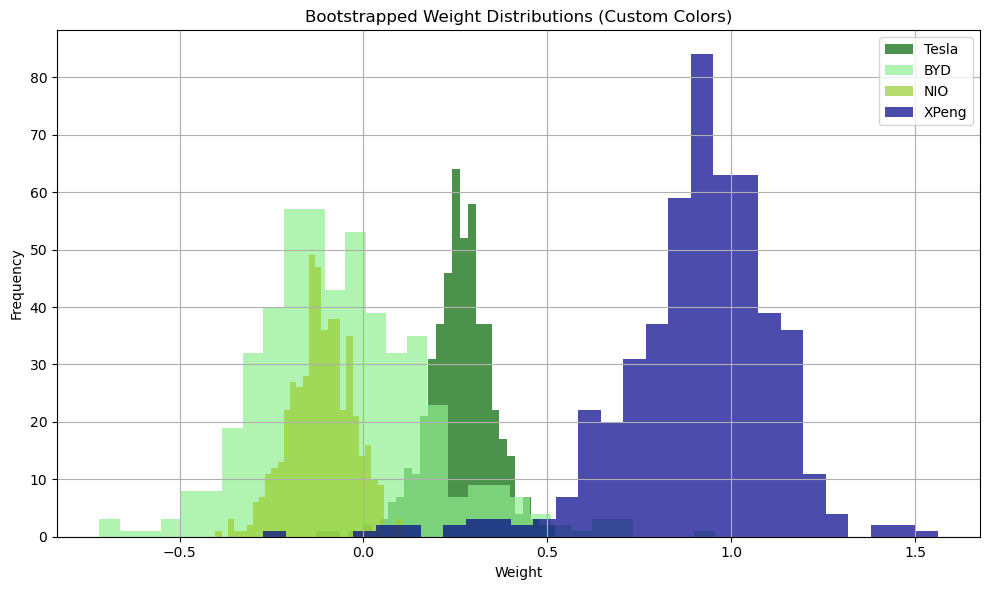

In [24]:
import matplotlib.pyplot as plt

# Custom colors
custom_colors = {
    'Tesla': 'darkgreen',
    'BYD': 'lightgreen',
    'NIO': 'yellowgreen',
    'XPeng': 'darkblue'  # Dark Blue
}

# Plot histograms
plt.figure(figsize=(10, 6))
for i, stock in enumerate(combined_returns.columns):
    plt.hist(
        boot_weights[:, i],
        bins=30,
        alpha=0.7,
        label=stock,
        color=custom_colors.get(stock, 'gray')
    )

plt.title("Bootstrapped Weight Distributions (Custom Colors)")
plt.xlabel("Weight")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**# Part 2: Trend Prediction Using LSTM** 

**# Goal:** Predict the next 3 months of stock prices (approx. 60 trading days)

**# Method:** Train an LSTM neural network on historical prices for each stock

In [ ]:
# Step 1: Load and Prepare Historical Price Data

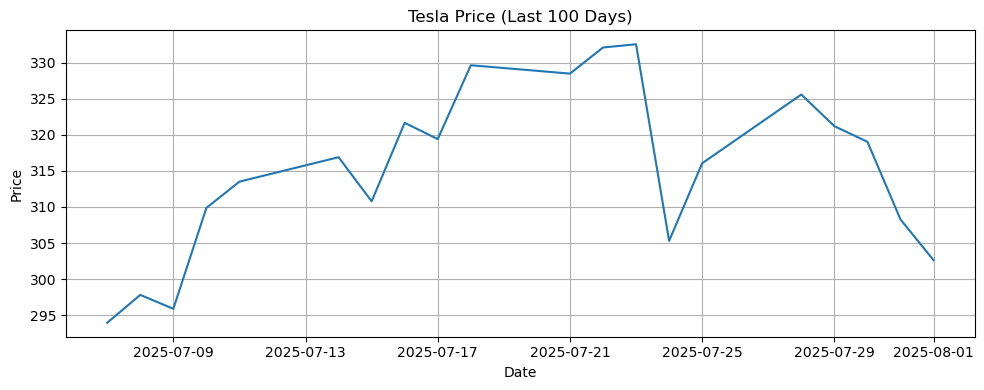

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Tesla stock price CSV (adjust path if needed)
tesla_path = r"C:\Users\Mandy_2024007\Desktop\Finacial Dataset\Tesla Stock Price History.csv"
tesla_df = pd.read_csv(tesla_path)

# Clean and prepare
tesla_df['Date'] = pd.to_datetime(tesla_df['Date'])
tesla_df = tesla_df.sort_values('Date')
tesla_df['Price'] = pd.to_numeric(tesla_df['Price'].astype(str).str.replace(',', ''), errors='coerce')
tesla_df = tesla_df.dropna()

# Reset index for sequence modeling
tesla_df = tesla_df.reset_index(drop=True)

# Plot last 100 days to inspect the trend
plt.figure(figsize=(10, 4))
plt.plot(tesla_df['Date'][-100:], tesla_df['Price'][-100:])
plt.title("Tesla Price (Last 100 Days)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.tight_layout()
plt.show()


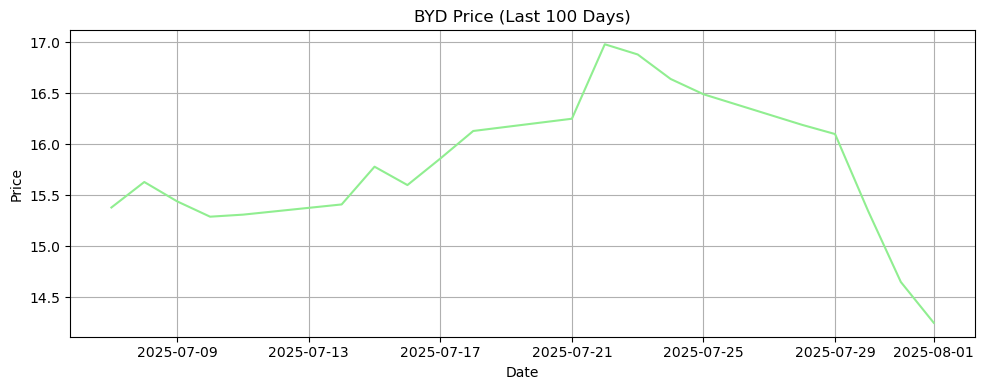

In [28]:
# Load BYD stock price data
byd_path = r"C:\Users\Mandy_2024007\Desktop\Finacial Dataset\BYD ADR Stock Price History.csv"
byd_df = pd.read_csv(byd_path)

# Clean and prepare
byd_df['Date'] = pd.to_datetime(byd_df['Date'])
byd_df = byd_df.sort_values('Date')
byd_df['Price'] = pd.to_numeric(byd_df['Price'].astype(str).str.replace(',', ''), errors='coerce')
byd_df = byd_df.dropna()
byd_df = byd_df.reset_index(drop=True)

# Plot last 100 days
plt.figure(figsize=(10, 4))
plt.plot(byd_df['Date'][-100:], byd_df['Price'][-100:], color='lightgreen')
plt.title("BYD Price (Last 100 Days)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.tight_layout()
plt.show()


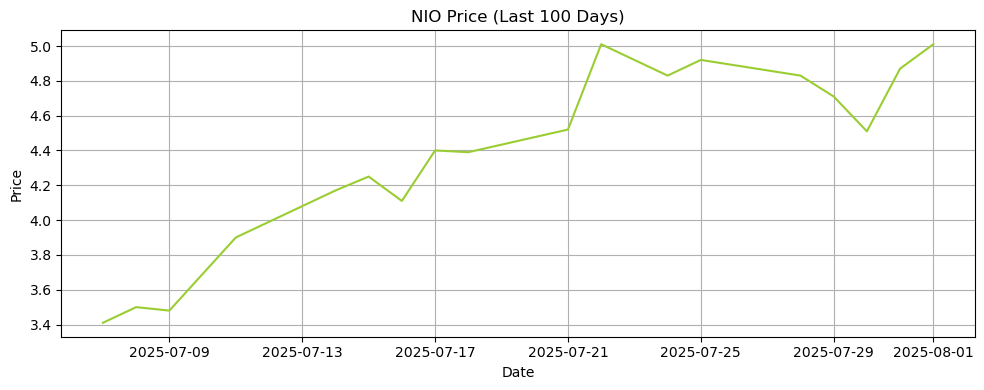

In [30]:
# Load NIO stock price data
nio_path = r"C:\Users\Mandy_2024007\Desktop\Finacial Dataset\Nio A ADR Stock Price History.csv"
nio_df = pd.read_csv(nio_path)

# Clean and prepare
nio_df['Date'] = pd.to_datetime(nio_df['Date'])
nio_df = nio_df.sort_values('Date')
nio_df['Price'] = pd.to_numeric(nio_df['Price'].astype(str).str.replace(',', ''), errors='coerce')
nio_df = nio_df.dropna()
nio_df = nio_df.reset_index(drop=True)

# Plot last 100 days
plt.figure(figsize=(10, 4))
plt.plot(nio_df['Date'][-100:], nio_df['Price'][-100:], color='yellowgreen')
plt.title("NIO Price (Last 100 Days)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.tight_layout()
plt.show()


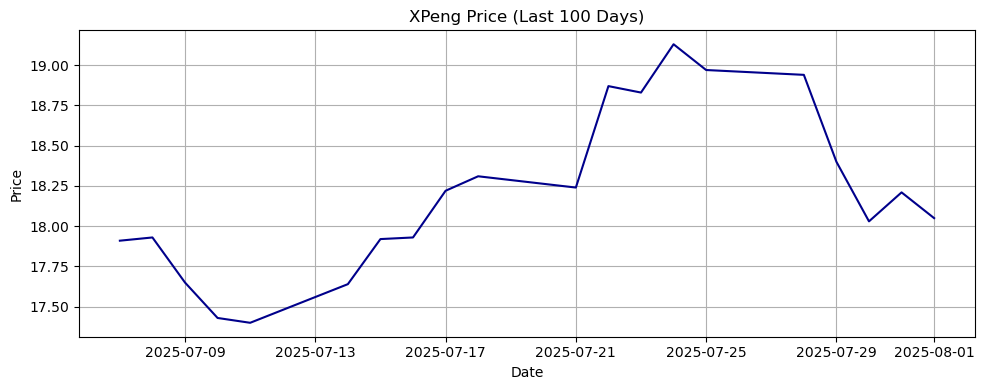

In [32]:
# Load XPeng stock price data
xpeng_path = r"C:\Users\Mandy_2024007\Desktop\Finacial Dataset\Xpeng Stock Price History.csv"
xpeng_df = pd.read_csv(xpeng_path)

# Clean and prepare
xpeng_df['Date'] = pd.to_datetime(xpeng_df['Date'])
xpeng_df = xpeng_df.sort_values('Date')
xpeng_df['Price'] = pd.to_numeric(xpeng_df['Price'].astype(str).str.replace(',', ''), errors='coerce')
xpeng_df = xpeng_df.dropna()
xpeng_df = xpeng_df.reset_index(drop=True)

# Plot last 100 days
plt.figure(figsize=(10, 4))
plt.plot(xpeng_df['Date'][-100:], xpeng_df['Price'][-100:], color='darkblue')
plt.title("XPeng Price (Last 100 Days)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Step 2: Normalize Prices and Create LSTM Input Sequences

**# We'll use:**

- MinMaxScaler to normalize price data between 0 and 1

- A sliding window of 60 days to create input sequences for LSTM

- Separate X (inputs) and y (targets)

In [ ]:
# Normalize & Create Sequences (Reusable Function)

Use this once per stock — I’ll first give you the reusable function, then show how to apply it to Tesla.

In [ ]:
# Function to Normalize and Create Sequences

In [34]:
from sklearn.preprocessing import MinMaxScaler

# Function to normalize and build 60-day input/output sequences
def prepare_lstm_data(df, feature_col='Price', window_size=60):
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(df[[feature_col]])
    
    X, y = [], []
    for i in range(window_size, len(scaled_data)):
        X.append(scaled_data[i-window_size:i])
        y.append(scaled_data[i])
    
    X, y = np.array(X), np.array(y)
    return X, y, scaler


In [ ]:
# 01: Prepare LSTM Data

In [45]:
# Tesla
X_tesla, y_tesla, scaler_tesla = prepare_lstm_data(tesla_df, window_size=5)
print(f"Tesla sequences: X={X_tesla.shape}, y={y_tesla.shape}")

# BYD
X_byd, y_byd, scaler_byd = prepare_lstm_data(byd_df, window_size=5)
print(f"BYD sequences: X={X_byd.shape}, y={y_byd.shape}")

# NIO
X_nio, y_nio, scaler_nio = prepare_lstm_data(nio_df, window_size=5)
print(f"NIO sequences: X={X_nio.shape}, y={y_nio.shape}")

# XPeng
X_xpeng, y_xpeng, scaler_xpeng = prepare_lstm_data(xpeng_df, window_size=5)
print(f"XPeng sequences: X={X_xpeng.shape}, y={y_xpeng.shape}")


Tesla sequences: X=(15, 5, 1), y=(15, 1)
BYD sequences: X=(15, 5, 1), y=(15, 1)
NIO sequences: X=(15, 5, 1), y=(15, 1)
XPeng sequences: X=(15, 5, 1), y=(15, 1)


In [ ]:
# Step 3: Build and Train the LSTM Model 

**# We’ll use:**

- A simple LSTM model with 2 layers

- MSE loss, Adam optimizer

- 50 epochs (We can increase this later if desired)

In [ ]:
# 01 – LSTM Model for Tesla

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input

model_tesla = Sequential()
model_tesla.add(Input(shape=(X_tesla.shape[1], 1)))  # New: Input layer
model_tesla.add(LSTM(units=50, return_sequences=True))
model_tesla.add(LSTM(units=50))
model_tesla.add(Dense(units=1))

model_tesla.compile(optimizer='adam', loss='mean_squared_error')
model_tesla.fit(X_tesla, y_tesla, epochs=50, batch_size=4, verbose=1)


Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.5390
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3212
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2829 
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1513 
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0962
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0633
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0785
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0604
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0743
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0551 
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0740 
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0588 
Epoch 13/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0683 
Epoch 14/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0550
Epoch 15/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0507 
Epoch 16/50
4/4 ━━━━━━━━━━━━━━━━━━

In [ ]:
**# Forecast the Next 60 Trading Days for Tesla**

**# We'll:**

- Start with the last 5 known prices (the last window)

- Predict 1 day ahead

- Append the prediction and slide the window forward

- Repeat for 60 steps

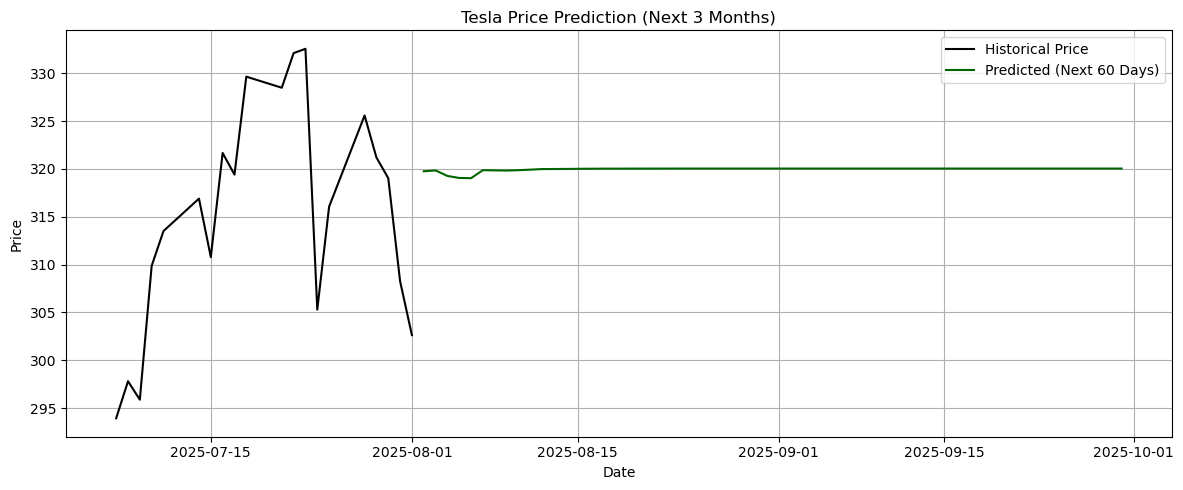

In [51]:
# Start with the last known sequence
last_sequence = X_tesla[-1]  # shape: (5, 1)
future_predictions = []

for _ in range(60):
    pred = model_tesla.predict(last_sequence.reshape(1, 5, 1), verbose=0)
    future_predictions.append(pred[0, 0])
    
    # Slide the window
    last_sequence = np.append(last_sequence[1:], pred[0, 0]).reshape(5, 1)

# Inverse scale predictions to actual price range
predicted_prices = scaler_tesla.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Create date range for plotting
from datetime import timedelta
last_date = tesla_df['Date'].iloc[-1]
future_dates = [last_date + timedelta(days=i) for i in range(1, 61)]

# Plot
plt.figure(figsize=(12, 5))
plt.plot(tesla_df['Date'], tesla_df['Price'], label="Historical Price", color="black")
plt.plot(future_dates, predicted_prices, label="Predicted (Next 60 Days)", color="darkgreen")
plt.title("Tesla Price Prediction (Next 3 Months)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# 02 BYD Forecasting & Plotting (Dark Green)

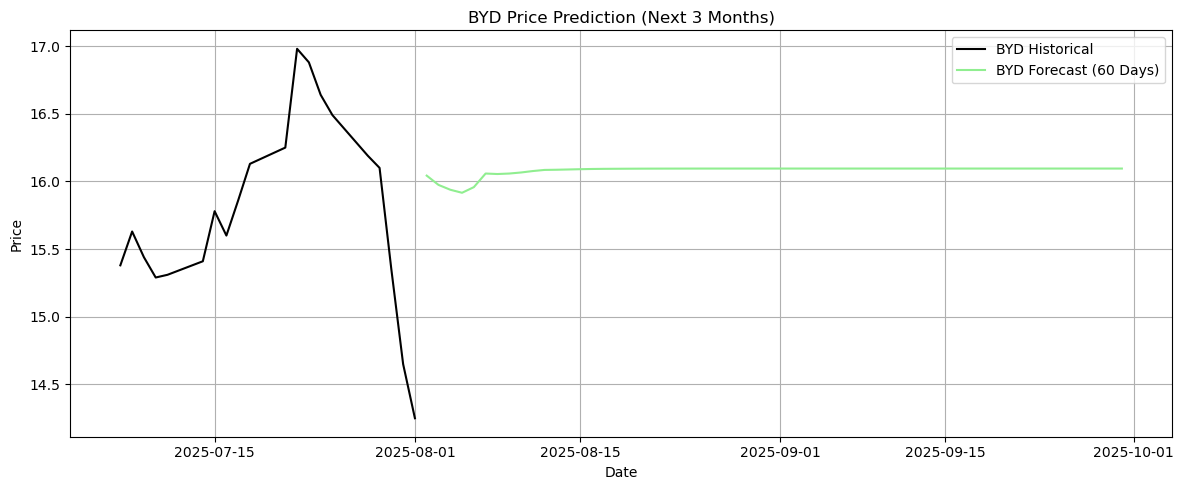

In [53]:
# Start with last BYD sequence
last_sequence_byd = X_byd[-1]
future_predictions_byd = []

for _ in range(60):
    pred = model_tesla.predict(last_sequence_byd.reshape(1, 5, 1), verbose=0)
    future_predictions_byd.append(pred[0, 0])
    last_sequence_byd = np.append(last_sequence_byd[1:], pred[0, 0]).reshape(5, 1)

predicted_prices_byd = scaler_byd.inverse_transform(np.array(future_predictions_byd).reshape(-1, 1))
future_dates_byd = [byd_df['Date'].iloc[-1] + timedelta(days=i) for i in range(1, 61)]

plt.figure(figsize=(12, 5))
plt.plot(byd_df['Date'], byd_df['Price'], label="BYD Historical", color="black")
plt.plot(future_dates_byd, predicted_prices_byd, label="BYD Forecast (60 Days)", color="lightgreen")
plt.title("BYD Price Prediction (Next 3 Months)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# 03 NIO Forecasting & Plotting (Yellow Green)

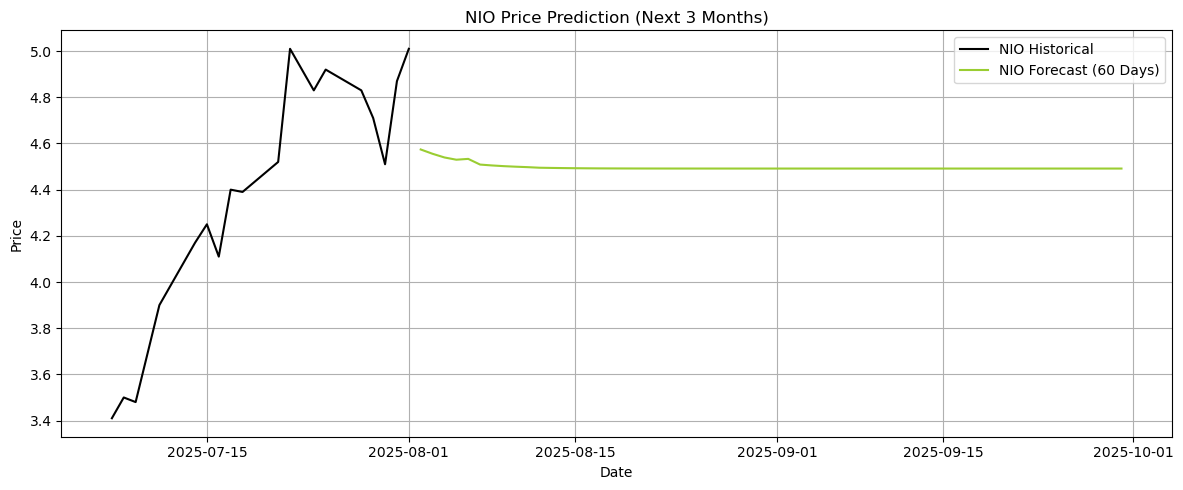

In [55]:
last_sequence_nio = X_nio[-1]
future_predictions_nio = []

for _ in range(60):
    pred = model_tesla.predict(last_sequence_nio.reshape(1, 5, 1), verbose=0)
    future_predictions_nio.append(pred[0, 0])
    last_sequence_nio = np.append(last_sequence_nio[1:], pred[0, 0]).reshape(5, 1)

predicted_prices_nio = scaler_nio.inverse_transform(np.array(future_predictions_nio).reshape(-1, 1))
future_dates_nio = [nio_df['Date'].iloc[-1] + timedelta(days=i) for i in range(1, 61)]

plt.figure(figsize=(12, 5))
plt.plot(nio_df['Date'], nio_df['Price'], label="NIO Historical", color="black")
plt.plot(future_dates_nio, predicted_prices_nio, label="NIO Forecast (60 Days)", color="yellowgreen")
plt.title("NIO Price Prediction (Next 3 Months)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# 04  XPeng Forecasting & Plotting (Dark Blue)

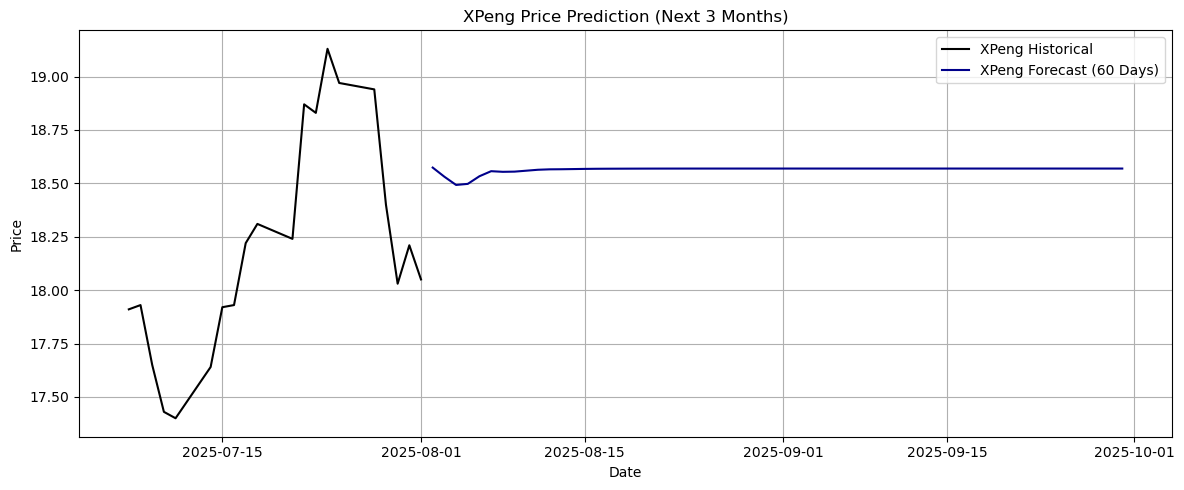

In [57]:
last_sequence_xpeng = X_xpeng[-1]
future_predictions_xpeng = []

for _ in range(60):
    pred = model_tesla.predict(last_sequence_xpeng.reshape(1, 5, 1), verbose=0)
    future_predictions_xpeng.append(pred[0, 0])
    last_sequence_xpeng = np.append(last_sequence_xpeng[1:], pred[0, 0]).reshape(5, 1)

predicted_prices_xpeng = scaler_xpeng.inverse_transform(np.array(future_predictions_xpeng).reshape(-1, 1))
future_dates_xpeng = [xpeng_df['Date'].iloc[-1] + timedelta(days=i) for i in range(1, 61)]

plt.figure(figsize=(12, 5))
plt.plot(xpeng_df['Date'], xpeng_df['Price'], label="XPeng Historical", color="black")
plt.plot(future_dates_xpeng, predicted_prices_xpeng, label="XPeng Forecast (60 Days)", color="darkblue")
plt.title("XPeng Price Prediction (Next 3 Months)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
These examples reuse the Tesla model for simplicity.